# RIS analysis using Hyperspy

## Access data

In [140]:
filename='Bruker.bcf'
#filename='20191113_1216_SI_EDS_HAADF_Nano_Diffraction_416_2_kx.emd'
#filename='09_52_08_Scanning_Acquire_0003.emi'
path='C:\\Users\Gabriella\Documents\EDS_data'
end='bcf'
#imports hyperspy
import hyperspy.api as hs
#imports os module
import os
#import hdf5
import h5py
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import curve fitter
from scipy.stats import norm
from scipy.optimize import curve_fit
from astropy import modeling
import matplotlib.pyplot as plt
#if the file path exists
if os.path.exists(path)==True:
    #change working directory to indicated path
    os.chdir(path)
#if the path does not exist
else:
    #tell user that path does not exist
    print('Path does not exist.')
#tell user what the current path is after statements
print('Working directory: ',os.getcwd())
#do same with filename

Working directory:  C:\Users\Gabriella\Documents\EDS_data


## Load data

In [141]:
#import data
data=hs.load(filename)
if end=='bcf':
    #reveal hidden information in item 1
    print(data[0])
    data[0].metadata
    #reveal hidden information in item 2
    print(data[1])
    data[1].metadata
if end=='emi':
    print(data)

<Signal2D, title: HAADF, dimensions: (|1024, 1024)>
<EDSTEMSpectrum, title: EDX, dimensions: (1024, 1024|4096)>


## Quantify data

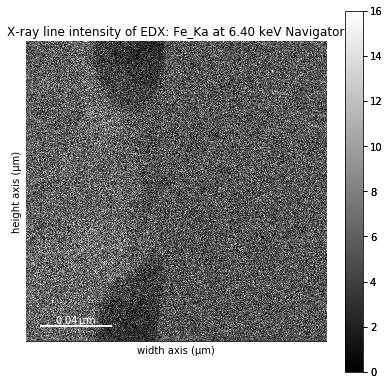

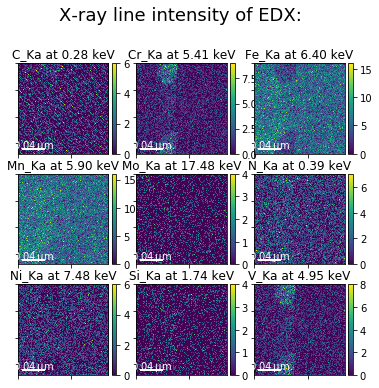

In [143]:
#width in eV or points along spectrum to integrate peak
#make so can change for certain peaks depending on resolution; probably in csv file
iw=data[1].estimate_integration_windows(windows_width=10)
#comment in how to add lines as csv file; pull in with window width
#get intensities of each line identified in metadata
intensities=data[1].get_lines_intensity(integration_windows=iw)
#quantify counts, add this feature after script works for intensity
#calculate kfactors with sim or sum corner and find k factor; can it done in hyperspy?
##quant=data[1].quantification(intensities,'CL',factors=kfactors)
#third item is Fe, automate finding of Fe index later
intensities[2].plot()
#plot all intensity maps
hs.plot.plot_images(intensities, cmap='viridis', axes_decor=None, scalebar='all')

## Determine grain boundary

In [144]:
#Fe depleted at grain boundary, use that data to find boundary
Fe=intensities[2]
#use to look at data or apply functions not within hyperspy
##Fe_data=np.exp(Fe).data
#get list of indices where minimum occurs in each row
min_ind=Fe.indexmin(axis=0).data

## Fit Gaussian

<Gaussian1D(amplitude=8., mean=2., stddev=1.)>

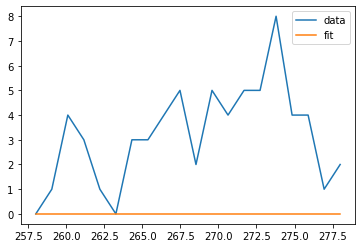

In [119]:
#Ni or Cr should be used to fit the Gaussian
Cr=intensities[1].data
#m=data[1].create_model()
#m.components
#m.plot(plot_components=True)
#m.fit_component('Fe_Ka')
#line=hs.model.components.Gaussian()
#m.append(line)
#m.fit(fitter="mpfit", bounded=True)
#row of data
line=1000
#half of width of area of interest
width=10
#x data
x=np.linspace(min_ind[line]-width,min_ind[line]+width,2*width)
#y data
y=Cr[line][min_ind[line]-width:min_ind[line]+width]
#fitting function
fitter=modeling.fitting.LevMarLSQFitter()
model=modeling.models.Gaussian1D(max(y),mean=Cr[line][min_ind[line]])
fitted_model=fitter(model,x,y)
#plot to check accuracy
plt.plot(x, y,label='data')
plt.plot(x, fitted_model(x),label='fit')
plt.legend()
fitted_model

## Calculate peak intensity

In [112]:
#use built in max function
max(y)

3.0

## Calculate integral intensity

In [113]:
#use built in integral function
#Cr.integrate1D(1).data
sum(y)

11.0